In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [9]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest ,SelectPercentile
from sklearn.metrics import accuracy_score


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
titanic = pd.read_csv(r'C:\Users\nikhi\Downloads\seaborn-data-master\titanic.csv')

In [26]:
titanic.shape

(891, 15)

In [34]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [29]:
titanic.drop(labels=['age','deck'],axis=1, inplace=True)

In [33]:
#titanic.isnull().sum()

In [31]:
titanic = titanic.dropna()

In [66]:
data = titanic[['pclass','sex','sibsp','parch','embarked','who','alone']].copy()

In [39]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [40]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [67]:
sex = {'male': 0, 'female': 1}
data['sex'] =data['sex'].map(sex)

In [68]:
#data.head()

In [69]:
ports = {'S':0, 'C':1, 'Q':2}
data['embarked'] = data['embarked'].map(ports)

In [70]:
who = {'man':0, 'woman':1, 'child':2}
data['who'] = data['who'].map(who)

In [71]:
alone = {True:1, False:0}
data['alone']= data['alone'].map(alone)

In [72]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


# Do F-test

In [74]:
X = data.copy()
y = titanic['survived']

In [75]:
X.shape,y.shape

((889, 7), (889,))

In [76]:
#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify = y )

In [77]:
f_score = chi2(X_train,y_train)

In [78]:
f_score

(array([ 22.46817652, 127.64828374,   0.50871161,  14.25078793,
          8.69437761, 134.81103701,  13.83341589]),
 array([2.13654083e-06, 1.34005266e-29, 4.75697123e-01, 1.59993812e-04,
        3.19193091e-03, 3.63135542e-31, 1.99751911e-04]))

In [79]:
p_values = pd.Series(f_score[1] , index =X_train.columns)                    #1 means we select 2nd array
p_values.sort_values(ascending = True , inplace=True)

In [80]:
p_values

who         3.631355e-31
sex         1.340053e-29
pclass      2.136541e-06
parch       1.599938e-04
alone       1.997519e-04
embarked    3.191931e-03
sibsp       4.756971e-01
dtype: float64

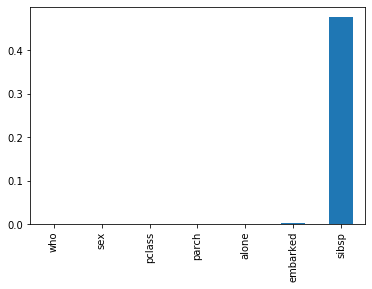

In [81]:
p_values.plot.bar()

In [82]:
X_train_2 = X_train[['who','sex']]
X_test_2  = X_test[['who','sex']]

In [83]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state= 0, n_jobs= -1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy:' )
    print(accuracy_score(y_test , y_pred))

In [ ]:
# Selected p-values 

In [84]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:
0.8089887640449438
Wall time: 1.57 s


In [87]:
X_train_3 = X_train[['who','sex','pclass']]
X_test_3 = X_test[['who','sex','pclass']]

In [88]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:
0.8370786516853933
Wall time: 363 ms


In [89]:
X_train_4 = X_train[['who','sex','pclass','embarked']]
X_test_4 = X_test[['who','sex','pclass','embarked']]

In [90]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:
0.8539325842696629
Wall time: 364 ms


In [92]:
X_train_5 = X_train[['who','sex','pclass','embarked','alone']]
X_test_5 = X_test[['who','sex','pclass','embarked','alone']]

In [93]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:
0.8426966292134831
Wall time: 357 ms


In [ ]:
# Original dataset

In [102]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:
0.848314606741573
Wall time: 373 ms
